# Regresión múltiple

Ejemplo de pipeline de preprocesado y regresión

Objetivo: predecir price que significa precio de vivienda

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('../../data/duke-forest-nulls.csv')
df.tail(1)

,address,price,bed,bath,area,type,year_built,heating,cooling,parking,lot,hoa,url
97,"2708 Circle Dr, Durham, NC 27705",674500,4,4.0,3766.0,Single Family,1955.0,"Forced air, Electric, Gas",other,0 spaces,0.73,NaN,https://www.zillow.com/homedetails/2708-Circle...


## Valores faltantes

Técnicas de imputación de valores faltantes: sklearn.impute

In [68]:
df.isnull().sum()

address        0
price          0
bed            0
bath           0
area           2
type           2
year_built     4
heating        1
cooling        1
parking        0
lot            1
hoa           97
url            0
dtype: int64

In [69]:
from sklearn.impute import SimpleImputer

# Estrategias para numérico: mean, median
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')

df['lot'] = imp_mean.fit_transform(df[['lot']]) # fit_transform recibe una 


In [70]:
df.isnull().sum()

address        0
price          0
bed            0
bath           0
area           2
type           2
year_built     4
heating        1
cooling        1
parking        0
lot            0
hoa           97
url            0
dtype: int64

## Ejemplo demo

In [71]:
from sklearn.impute import KNNImputer

df = pd.DataFrame({
    'edad': [25, np.nan, 40, 35, 60, np.nan],
    'genero': ['masculino', 'femenino', np.nan, 'masculino', np.nan, 'femenino'],
    'ingresos': [30000, 70000, np.nan, 80000, np.nan, 40000]
})

imp_knn = KNNImputer(n_neighbors=2) 
df['edad'] = imp_mean.fit_transform(df[['edad']])
df.head()

,edad,genero,ingresos
0,25.0,masculino,30000.0
1,37.5,femenino,70000.0
2,40.0,NaN,NaN
3,35.0,masculino,80000.0
4,60.0,NaN,NaN


In [72]:
from sklearn.experimental import enable_iterative_imputer
# CUIDADO EL "enable_interative_imputer" se ejecuta antes
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

df = pd.DataFrame({
    'edad': [25, np.nan, 40, 35, 60, np.nan],
    'genero': ['masculino', 'femenino', np.nan, 'masculino', np.nan, 'femenino'],
    'ingresos': [30000, 70000, np.nan, 80000, np.nan, 40000]
})

# Opción 1 SimpleImputer por media o mediana:
# media o mediana:
# imp_mean = SimpleImputer(missing_values=np.nan. strategy='median')
# df['edad'] = imp_mean.fit_transform(df[['edad']])

# Opción 2 KNNImputer: media pero de las filas más cercanas según el algoritmo de KNN:
# imp_knn = KNNImputer(n_neighbors=2) # calcula la media de los n_neighbors más cercanos
# df['edad'] = imp_knn.fit_transform(df[['edad']])
# df['ingresos'] = imp_knn.fit_transform(df[['ingresos']])

# Opción 3 SimpleImputer constante: asignamos un valor fijo
# imp_constant = SimpleImputer(strategy='constant', fill_value='other)
#df['genero'] = imp_knn.fit_transform(df[['genero]])

# Opción 4 SimpleImputer con el valor más frecuente (moda)
# imp_mode = SimpleImputer(strategy='most_frequent')
# df['genero'] = imp_mode.fit_transform(df[['genero']])

# Opción 5 IterativeImputer con una predicción utilizado un aregresión 
imp_iter = IterativeImputer(random_state=42)
df['ingresos'] = imp_iter.fit_transform(df[['ingresos']])

df.head()

,edad,genero,ingresos
0,25.0,masculino,30000.0
1,NaN,femenino,70000.0
2,40.0,NaN,55000.0
3,35.0,masculino,80000.0
4,60.0,NaN,55000.0


## Ejemplo duke forest

In [73]:
df = pd.read_csv('../../data/duke-forest-nulls.csv')

df.isnull().sum()

address        0
price          0
bed            0
bath           0
area           2
type           2
year_built     4
heating        1
cooling        1
parking        0
lot            1
hoa           97
url            0
dtype: int64

In [74]:
df.head(2)

,address,price,bed,bath,area,type,year_built,heating,cooling,parking,lot,hoa,url
0,"1 Learned Pl, Durham, NC 27705",1520000,3,4.0,6040.0,Single Family,1972.0,"Other, Gas",central,0 spaces,0.97,NaN,https://www.zillow.com/homedetails/1-Learned-P...
1,"1616 Pinecrest Rd, Durham, NC 27705",1030000,5,4.0,4475.0,Single Family,1969.0,"Forced air, Gas",central,"Carport, Covered",1.38,NaN,https://www.zillow.com/homedetails/1616-Pinecr...


In [75]:
df['type'].value_counts()

Single Family    96
Name: type, dtype: int64

In [76]:
df['parking'].value_counts()

0 spaces                                                     42
Carport, Covered                                             11
Garage - Attached, Covered                                   10
Garage - Attached                                            10
Covered                                                       4
Carport, Garage - Attached, Covered                           3
Off-street, Covered                                           2
Garage, Garage - Detached, Covered                            2
Garage - Attached, Garage - Detached, Covered                 2
Garage, Carport, Covered                                      2
Garage                                                        2
Garage - Detached, Off-street, Covered                        1
Garage, Garage - Detached, Off-street, Covered                1
Garage, Garage - Detached, Off-street, On-street, Covered     1
Off-street                                                    1
Garage, Garage - Detached, Off-street   

In [77]:
# parking se puede procesar con pandas e intentar sacar el número de plazas
df = df.drop(['address', 'hoa', 'url', 'type', 'parking'], axis=1)
df.head(2)

,price,bed,bath,area,year_built,heating,cooling,lot
0,1520000,3,4.0,6040.0,1972.0,"Other, Gas",central,0.97
1,1030000,5,4.0,4475.0,1969.0,"Forced air, Gas",central,1.38


In [78]:

numeric_cols  = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

print(numeric_cols)
print(categorical_cols)

# IterativeImputer a numéricas
df[numeric_cols] = IterativeImputer(random_state=42).fit_transform(df[numeric_cols])

# SimpleImputer most_frequent a categóricas
df[categorical_cols] = SimpleImputer(strategy='most_frequent').fit_transform(df[categorical_cols])

df.isnull().sum()

Index(['price', 'bed', 'bath', 'area', 'year_built', 'lot'], dtype='object')
Index(['heating', 'cooling'], dtype='object')


price         0
bed           0
bath          0
area          0
year_built    0
heating       0
cooling       0
lot           0
dtype: int64

## EDA

* pairplot
* heatmap
* scatterplot

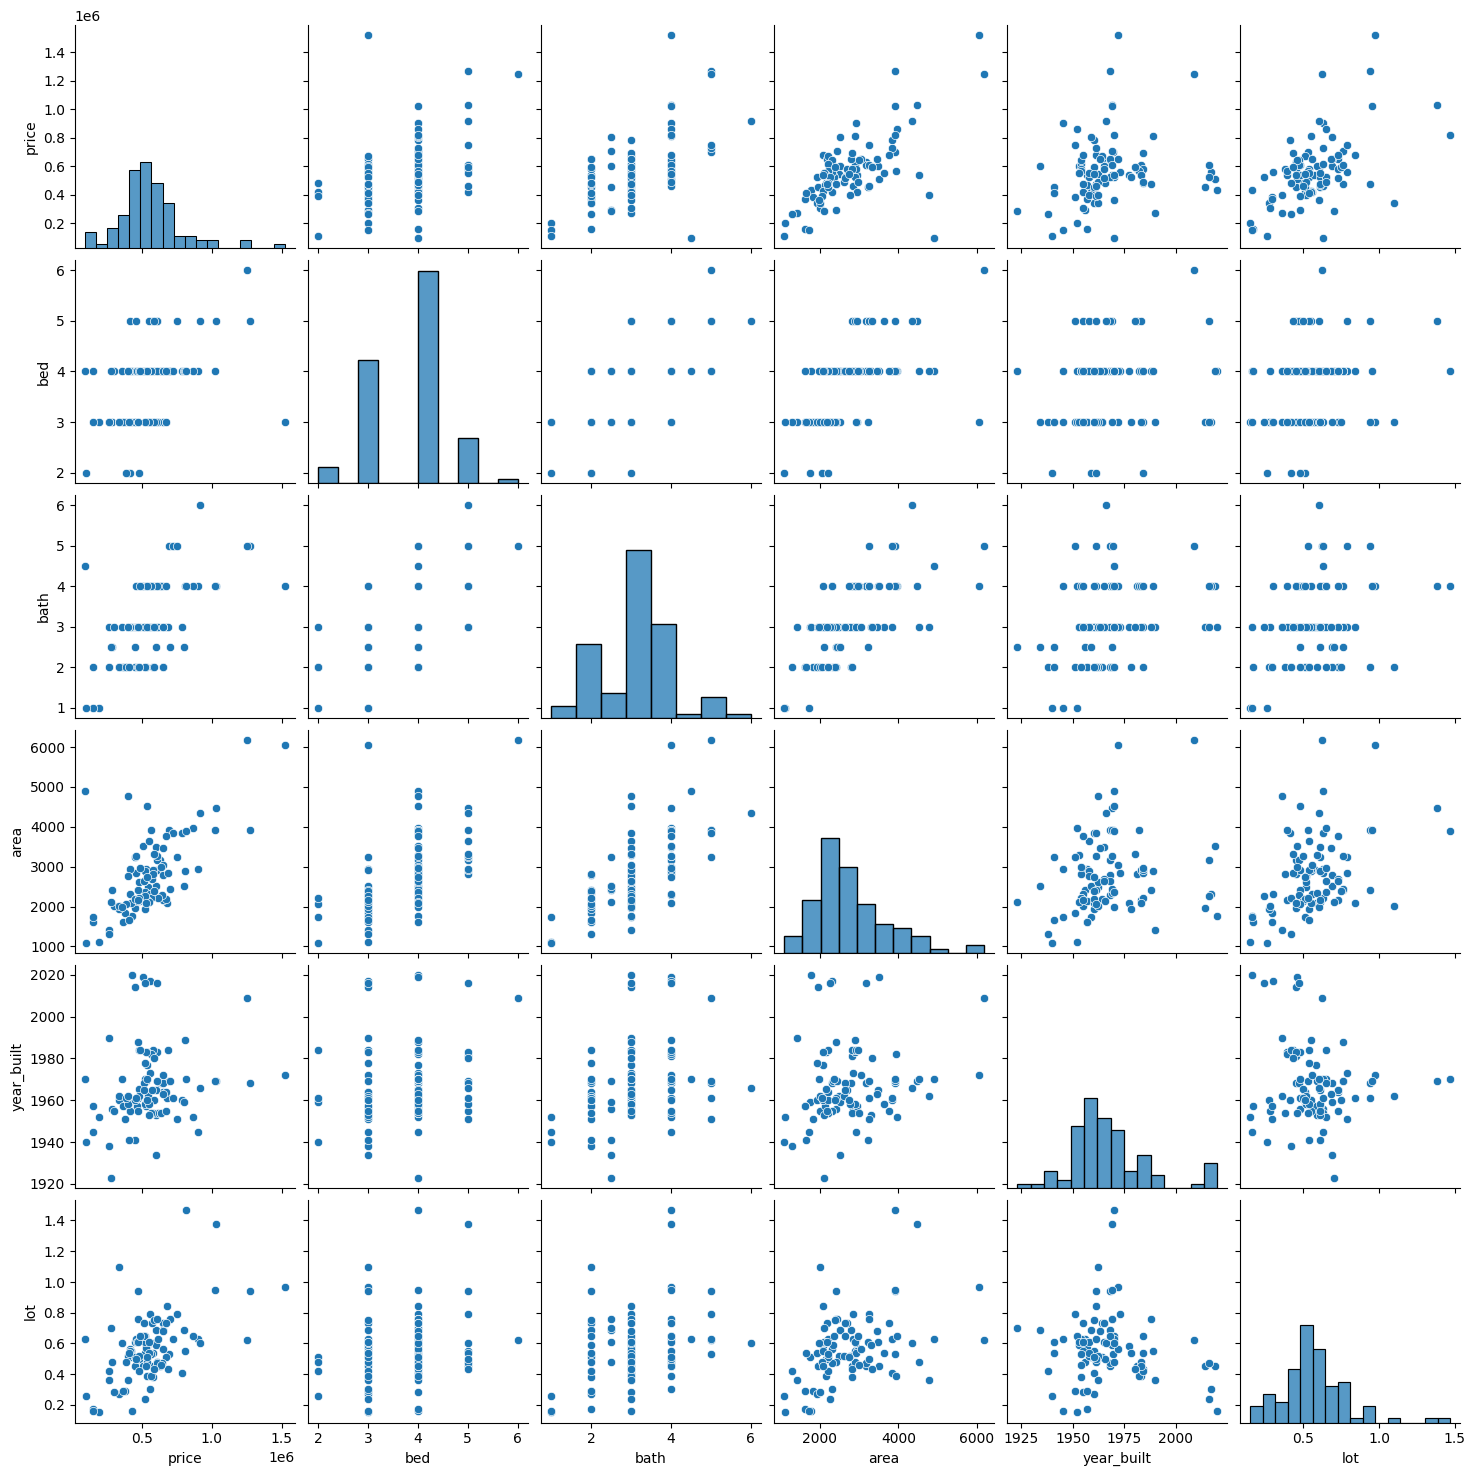

In [79]:
sns.pairplot(df)

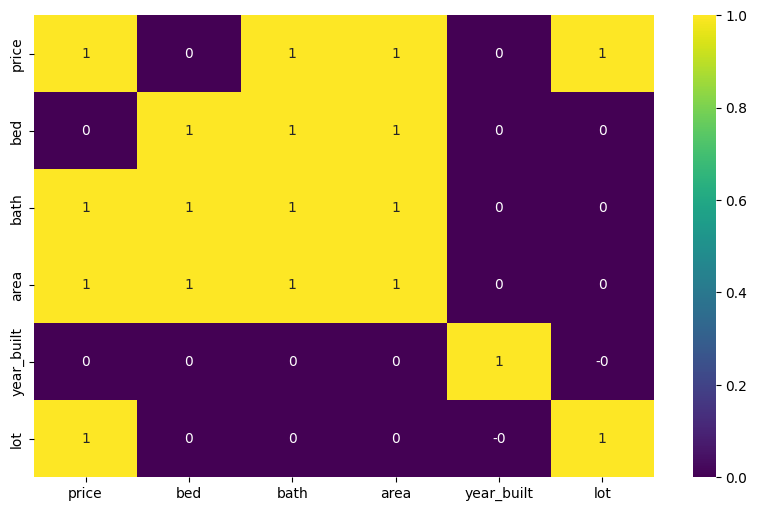

In [80]:


plt.figure(figsize=(10, 6))
df_corr = df.corr(numeric_only=True).round()
sns.heatmap(df_corr, cmap='viridis', annot=True);

<Axes: xlabel='area', ylabel='price'>

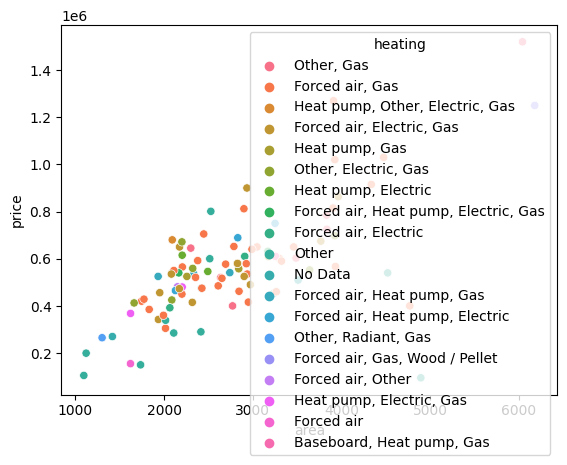

In [81]:
sns.scatterplot(data=df, x='area', y='price', hue='heating')

<Axes: xlabel='area', ylabel='price'>

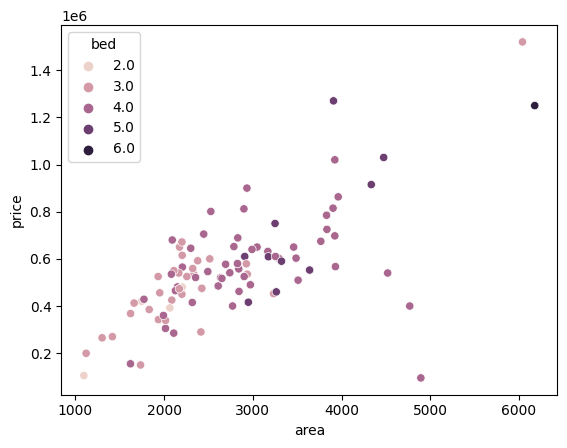

In [82]:
sns.scatterplot(data=df, x='area', y='price', hue='bed')

<Axes: xlabel='area', ylabel='price'>

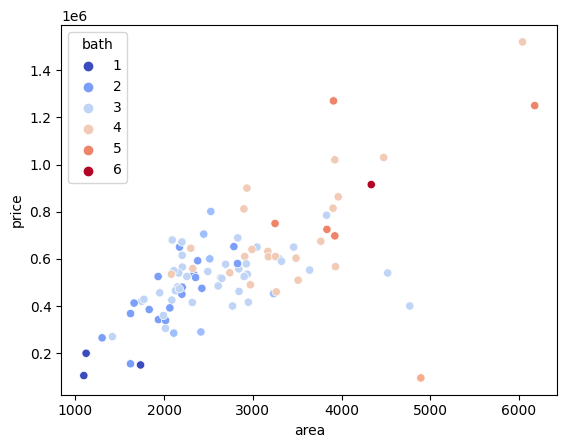

In [83]:
sns.scatterplot(data=df, x='area', y='price', hue='bath', palette='coolwarm')

## Codificación categórico a numérico

In [84]:
from  sklearn.preprocessing import OneHotEncoder

# equivalente a pandas

df['heating'].value_counts()

Forced air, Gas                         34
Forced air, Electric, Gas               14
Other                                   12
Other, Gas                               7
Other, Electric, Gas                     6
Heat pump, Gas                           3
Forced air, Heat pump, Gas               3
Forced air, Heat pump, Electric          3
Heat pump, Electric                      2
Forced air, Heat pump, Electric, Gas     2
Forced air, Electric                     2
No Data                                  2
Heat pump, Electric, Gas                 2
Heat pump, Other, Electric, Gas          1
Other, Radiant, Gas                      1
Forced air, Gas, Wood / Pellet           1
Forced air, Other                        1
Forced air                               1
Baseboard, Heat pump, Gas                1
Name: heating, dtype: int64

In [85]:

df['heating'].str.split(',')

0                            [Other,  Gas]
1                       [Forced air,  Gas]
2                       [Forced air,  Gas]
3     [Heat pump,  Other,  Electric,  Gas]
4                       [Forced air,  Gas]
                      ...                 
93          [Forced air,  Heat pump,  Gas]
94           [Forced air,  Electric,  Gas]
95           [Forced air,  Electric,  Gas]
96                      [Forced air,  Gas]
97           [Forced air,  Electric,  Gas]
Name: heating, Length: 98, dtype: object

In [86]:

df['heating_int'] = df['heating'].str.split(',').apply(len)

<Axes: xlabel='area', ylabel='price'>

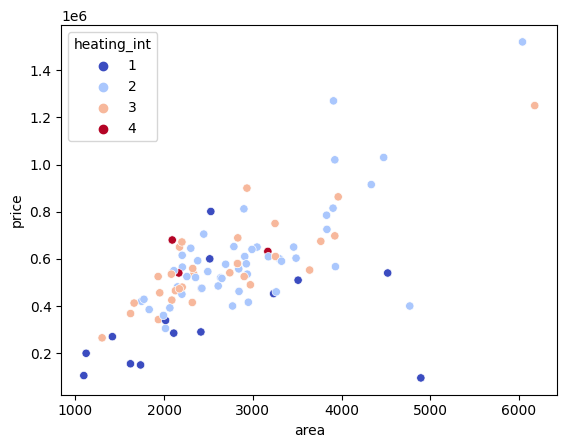

In [87]:
sns.scatterplot(data=df, x='area', y='price', hue='heating_int', palette='coolwarm')

<Axes: xlabel='area', ylabel='price'>

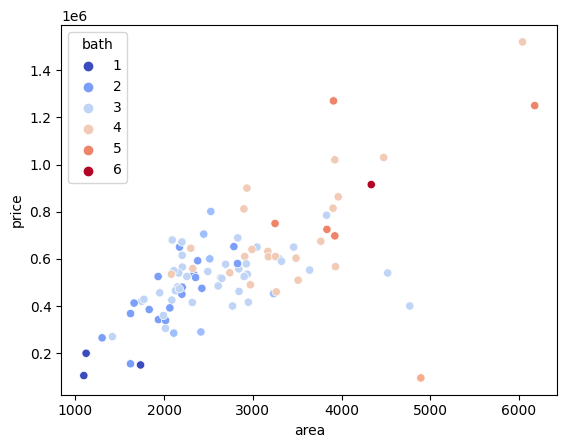

In [88]:
sns.scatterplot(data=df, x='area', y='price', hue='bath', palette='coolwarm')

## Codificación categórico a numérico

In [89]:
from sklearn.preprocessing import OneHotEncoder

# equivalente a get_dummies de pandas

df['heating'].value_counts()

Forced air, Gas                         34
Forced air, Electric, Gas               14
Other                                   12
Other, Gas                               7
Other, Electric, Gas                     6
Heat pump, Gas                           3
Forced air, Heat pump, Gas               3
Forced air, Heat pump, Electric          3
Heat pump, Electric                      2
Forced air, Heat pump, Electric, Gas     2
Forced air, Electric                     2
No Data                                  2
Heat pump, Electric, Gas                 2
Heat pump, Other, Electric, Gas          1
Other, Radiant, Gas                      1
Forced air, Gas, Wood / Pellet           1
Forced air, Other                        1
Forced air                               1
Baseboard, Heat pump, Gas                1
Name: heating, dtype: int64

In [97]:
df['heating_int'] = df['heating'].str.split(',').apply(len)

<Axes: xlabel='area', ylabel='price'>

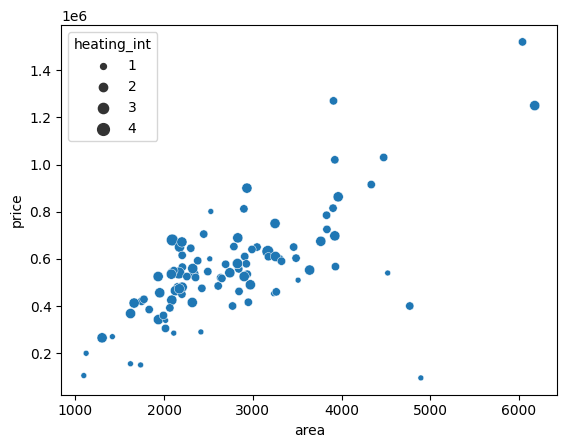

In [98]:
sns.scatterplot(data=df, x='area', y='price', size='heating_int')

In [99]:
# Opción 2: función personalizada para tratar la columna heating
df['heating'].value_counts()

Forced air, Gas                         34
Forced air, Electric, Gas               14
Other                                   12
Other, Gas                               7
Other, Electric, Gas                     6
Heat pump, Gas                           3
Forced air, Heat pump, Gas               3
Forced air, Heat pump, Electric          3
Heat pump, Electric                      2
Forced air, Heat pump, Electric, Gas     2
Forced air, Electric                     2
No Data                                  2
Heat pump, Electric, Gas                 2
Heat pump, Other, Electric, Gas          1
Other, Radiant, Gas                      1
Forced air, Gas, Wood / Pellet           1
Forced air, Other                        1
Forced air                               1
Baseboard, Heat pump, Gas                1
Name: heating, dtype: int64

In [101]:
# sarahana ny fampisehoana ny "No Data", #Other# sy ny "Mixed" valin'ny etsy ambony
def classify_heating(heating):
    
#    if 'No Data' in heating:
#        return 'No Data'
#    elif 'Other' == heating:
#        return 'Other'
#    elif ',' in heating:
#        return 'Mixed'
#    else:
#        return 'Other'

        
    return heating.split(',')[0]
    
df['heating_int'] = df['heating'].apply(classify_heating)
df['heating_int'].value_counts()

Forced air    61
Other         26
Heat pump      8
No Data        2
Baseboard      1
Name: heating_int, dtype: int64

In [102]:
df['heating'].value_counts()

Forced air, Gas                         34
Forced air, Electric, Gas               14
Other                                   12
Other, Gas                               7
Other, Electric, Gas                     6
Heat pump, Gas                           3
Forced air, Heat pump, Gas               3
Forced air, Heat pump, Electric          3
Heat pump, Electric                      2
Forced air, Heat pump, Electric, Gas     2
Forced air, Electric                     2
No Data                                  2
Heat pump, Electric, Gas                 2
Heat pump, Other, Electric, Gas          1
Other, Radiant, Gas                      1
Forced air, Gas, Wood / Pellet           1
Forced air, Other                        1
Forced air                               1
Baseboard, Heat pump, Gas                1
Name: heating, dtype: int64

In [ ]:
heating_types = ['Forced air', 'Gas', 'Electric', 'Other', 'Heat pump', 'No Data', 'Radiant', 'Wood / Pellet', 'Baseboard']

for heating_type in heating_types:
    df[heating_type] = df['heating'].apply(lambda x: int(heating_type))

## Preparar DataFrame de resultado

* Modelo
* MAE
* RMSE

## Regresión lineal simple

## Comparación de resultados